## *Step-1: Business Problem Understanding*
- predict Whether a person will get depressed or not.

## *Step-2: Data Understanding*

**Import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

**Load the data**

In [28]:
data = pd.read_csv('train.csv')
pd.set_option('display.max_columns',None)
data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [30]:
data.shape

(140700, 20)

**Understand each and every column**

- **id:** Unique numbers
- **Name:** Name of the person
- **Gender:** Gender of the person
- **Age:** Age of the person
- **City:** City of the person
- **Working Professional or Student:** Is the person currently working or studying
- **Profession:** Profession of the Person
- **Academic Pressure:** Is the student pressurized from academic
- **Work Pressure:** Is the person getting pressure from his work
- **CGPA:** CGPA of the student
- **Study Satisfaction:** How much the student is satisfied from his study
- **Job Satisfaction:** How much the person satidfied from his job
- **Sleep Duration:** How much hours sleep
- **Dietary Habits:** What is the health condition now
- **Degree:** Education status
- **Have you ever had suicidal thoughts?:** Is The person ever thinking about of suicide
- **Work/Study Hours:** How many hours the person/ student work or study
- **Financial Stress:** Is the person having financial stress.
- **Family History of Mental Illness:** indicates whether an individual has a known history of mental health conditions within their family, typically represented by a binary value (e.g., "Yes" or "No").
- **Depression:** Whether the person will suffer from depression or not

**Rename Columns**

In [34]:
# data.rename(columns={"Working Professional or Student": "Professional_Student",
#                     "Have you ever had suicidal thoughts ?" : "Suicidal_thoughts",
#                     "Family History of Mental Illness" : "Family_History",
#                     "Academic Pressure":'Academic_Pressure','Work Pressure':'Work_Pressure',
#                      'Study Satisfaction':'Study_Satisfaction','Job Satisfaction':'Job_Satisfaction',
#                      'Sleep Duration':'Sleep_Duration','Dietary Habits':'Dietary_Habits','Financial Stress':'Financial_Stress',
#                      'Work/Study Hours':'Work_Study_Hours'
#                     }, inplace=True)

**Data Exploration**

In [37]:
print(f'No of Rows: {data.shape[0]}')
print(f'No of Columns: {data.shape[1]}')

No of Rows: 140700
No of Columns: 20


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    140700 non-null  int64  
 1   Name                  140700 non-null  object 
 2   Gender                140700 non-null  object 
 3   Age                   140700 non-null  float64
 4   City                  140700 non-null  object 
 5   Professional_Student  140700 non-null  object 
 6   Profession            104070 non-null  object 
 7   Academic_Pressure     27897 non-null   float64
 8   Work_Pressure         112782 non-null  float64
 9   CGPA                  27898 non-null   float64
 10  Study_Satisfaction    27897 non-null   float64
 11  Job_Satisfaction      112790 non-null  float64
 12  Sleep_Duration        140700 non-null  object 
 13  Dietary_Habits        140696 non-null  object 
 14  Degree                140698 non-null  object 
 15  

In [41]:
data.columns

Index(['id', 'Name', 'Gender', 'Age', 'City', 'Professional_Student',
       'Profession', 'Academic_Pressure', 'Work_Pressure', 'CGPA',
       'Study_Satisfaction', 'Job_Satisfaction', 'Sleep_Duration',
       'Dietary_Habits', 'Degree', 'Suicidal_thoughts', 'Work_Study_Hours',
       'Financial_Stress', 'Family_History', 'Depression'],
      dtype='object')

In [17]:
continous=['Age']
discrete_count=['Sleep Duration','Work/Study Hours']
ordinal=['Work Pressure','Job Satisfaction',
         'Financial Stress'
        ]
nominal=['Gender','City','Working Professional or Student','Profession',
         'Dietary Habits','Degree','Have you ever had suicidal thoughts ?',
         'Family History of Mental Illness','Depression'
        ]
other=['Name','id']

In [19]:
col_name = []
unique_count = []
for col in discrete_count+ordinal+nominal+other:
    count = data[col].nunique()
    unique_count.append(count)
    col_name.append(col)

unique_df = pd.DataFrame({'Unique_count':unique_count},index=col_name)
print('No of Unique values In each Column:')
unique_df.T

No of Unique values In each Column:


,Sleep Duration,Work/Study Hours,Work Pressure,Job Satisfaction,Financial Stress,Gender,City,Working Professional or Student,Profession,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression,Name,id
Unique_count,36,13,5,5,5,2,98,2,64,23,115,2,2,2,422,140700


**Feature Selection (Wrapper Method)**

**1. Based on no of unique values**

In [23]:
# Drop columns based on no of unique values
drop_cols = ['Name','City','id']
data.drop(columns=drop_cols,inplace=True)

**2. Based on missing values**

In [26]:
data.isnull().sum()

Gender                                        0
Age                                           0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [28]:
# drop columns that have more than 30% missing values
drop_cols = ['Academic Pressure','CGPA','Study Satisfaction']
data.drop(columns=drop_cols,inplace=True)

**Categorical column exploration (No of Unique values and value counts)**

**1. Sleep Duration**

In [78]:
pd.DataFrame({'unique':data['Sleep Duration'].unique().tolist()}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
unique,More than 8 hours,Less than 5 hours,5-6 hours,7-8 hours,Sleep_Duration,1-2 hours,6-8 hours,4-6 hours,6-7 hours,10-11 hours,8-9 hours,40-45 hours,9-11 hours,2-3 hours,3-4 hours,Moderate,55-66 hours,4-5 hours,9-6 hours,1-3 hours,Indore,45,1-6 hours,35-36 hours,8 hours,No,10-6 hours,than 5 hours,49 hours,Unhealthy,Work_Study_Hours,3-6 hours,45-48 hours,9-5,Pune,9-5 hours


In [80]:
data['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

**Observations**
- More number of unique values are there need to be handled

**2. Work/Study Hours**

In [226]:
pd.DataFrame({'unique':data['Work/Study Hours'].unique().tolist()}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
unique,1.0,7.0,3.0,10.0,9.0,6.0,8.0,2.0,0.0,5.0,12.0,4.0,11.0


In [228]:
data['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    14199
11.0    12832
9.0     12711
0.0     12066
12.0    11409
2.0     10595
6.0     10432
7.0      9872
1.0      9802
3.0      9474
5.0      9337
4.0      9065
8.0      8906
Name: count, dtype: int64

**3. Work Pressure**

In [231]:
pd.DataFrame({'unique':data['Work Pressure'].unique().tolist()}).T

,0,1,2,3,4,5
unique,5.0,4.0,NaN,1.0,2.0,3.0


In [233]:
data['Work Pressure'].value_counts()

Work Pressure
2.0    24373
4.0    22512
5.0    22436
3.0    21899
1.0    21562
Name: count, dtype: int64

**4. Job Satisfaction**

In [236]:
pd.DataFrame({'unique':data['Job Satisfaction'].unique().tolist()}).T

,0,1,2,3,4,5
unique,2.0,3.0,NaN,1.0,5.0,4.0


In [238]:
data['Job Satisfaction'].value_counts()

Job Satisfaction
2.0    24783
5.0    22812
1.0    22324
3.0    21951
4.0    20920
Name: count, dtype: int64

**5. Financial Stress**

In [241]:
pd.DataFrame({'unique':data['Financial Stress'].unique().tolist()}).T

,0,1,2,3,4,5
unique,2.0,3.0,1.0,4.0,5.0,NaN


In [243]:
data['Financial Stress'].value_counts()

Financial Stress
2.0    31451
5.0    28279
4.0    27765
1.0    27211
3.0    25990
Name: count, dtype: int64

**6. Gender**

In [246]:
pd.DataFrame({'unique':data['Gender'].unique().tolist()}).T

,0,1
unique,Female,Male


In [248]:
data['Gender'].value_counts()

Gender
Male      77464
Female    63236
Name: count, dtype: int64

**7. Working Professional or Student**

In [251]:
pd.DataFrame({'unique':data['Working Professional or Student'].unique().tolist()}).T

,0,1
unique,Working Professional,Student


In [253]:
data['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

**8. Profession**

In [256]:
pd.DataFrame({'unique':data['Profession'].unique().tolist()}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
unique,Chef,Teacher,NaN,Business Analyst,Finanancial Analyst,Chemist,Electrician,Software Engineer,Data Scientist,Plumber,Marketing Manager,Accountant,Entrepreneur,HR Manager,UX/UI Designer,Content Writer,Educational Consultant,Civil Engineer,Manager,Pharmacist,Financial Analyst,Architect,Mechanical Engineer,Customer Support,Consultant,Judge,Researcher,Pilot,Graphic Designer,Travel Consultant,Digital Marketer,Lawyer,Research Analyst,Sales Executive,Doctor,Unemployed,Investment Banker,Family Consultant,B.Com,BE,Student,Yogesh,Dev,MBA,LLM,BCA,Academic,Profession,FamilyVirar,City Manager,BBA,Medical Doctor,Working Professional,MBBS,Patna,Unveil,B.Ed,Nagpur,Moderate,M.Ed,Analyst,Pranav,Visakhapatnam,PhD,Yuvraj


In [258]:
# More number of unique values are there check later for
# Try later categorizing into 5-10 categorize
data['Profession'].value_counts()

Profession
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 1339
Finanancial Analyst        13

**Observations**
- More number of unique values are there need to be handled

**9. Dietary Habits**

In [262]:
pd.DataFrame({'unique':data['Dietary Habits'].unique().tolist()}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
unique,Healthy,Unhealthy,Moderate,Yes,Pratham,BSc,Gender,3,More Healthy,Less than Healthy,Mihir,1.0,Hormonal,Electrician,NaN,No Healthy,Less Healthy,M.Tech,Vegas,No,Male,Indoor,Class 12,2


In [264]:
data['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

**Observations**
- More number of unique values are there need to be handled

**10. Degree**

In [268]:
pd.DataFrame({'unique':data['Degree'].unique().tolist()}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
unique,BHM,LLB,B.Pharm,BBA,MCA,MD,BSc,ME,B.Arch,BCA,BE,MA,B.Ed,B.Com,MBA,M.Com,MHM,BA,Class 12,M.Tech,PhD,M.Ed,MSc,B.Tech,LLM,MBBS,M.Pharm,UX/UI Designer,MPA,BH,Nalini,BEd,B.Sc,Veda,Bhopal,S.Tech,Degree,20,Class 11,H_Pharm,M,P.Com,BPharm,Business Analyst,M.Arch,LL.Com,Data Scientist,MPharm,L.Ed,P.Pharm,Kalyan,Unite,BArch,HR Manager,Badhya,S.Pharm,LLBA,Vrinda,M. Business Analyst,Bhavesh,0,LLCom,29,MTech,Vivaan,BPA,Plumber,5.61,Brit,B.03,Ritik,5.56,MEd,B,B BA,7.06,B.B.Arch,ACA,Brithika,CGPA,24,M_Tech,Pihu,BB,Jhanvi,LLTech,Aarav,Entrepreneur,8.56,LHM,Lata,S.Arch,Marsh,HCA,5.88,B.Student,LL B.Ed,M.S,Navya,Mahika,NaN,K.Ed,B.3.79,Mthanya,Working Professional,Esha,LLS,LLEd,E.Tech,Doctor,N.Pharm,LCA,B B.Com,RCA,Mihir,Advait


In [81]:
data['Degree'].value_counts()[:8]

Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
BCA          5739
M.Ed         5668
MCA          5234
Name: count, dtype: int64

**Observations**
- More number of unique values are there need to be handled

**11. Have you ever had suicidal thoughts ?**

In [85]:
pd.DataFrame({'unique':data['Have you ever had suicidal thoughts ?'].unique().tolist()}).T

,0,1
unique,No,Yes


In [87]:
data['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
No     71138
Yes    69562
Name: count, dtype: int64

**12. Family History of Mental Illness**

In [90]:
pd.DataFrame({'unique':data['Family History of Mental Illness'].unique().tolist()}).T

,0,1
unique,No,Yes


In [92]:
data['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     70758
Yes    69942
Name: count, dtype: int64

**13. Depression**

In [95]:
pd.DataFrame({'unique':data['Depression'].unique().tolist()}).T

,0,1
unique,0,1


In [97]:
data['Depression'].value_counts()

Depression
0    115133
1     25567
Name: count, dtype: int64

In [99]:
115133/25567
# Class imbalance problem arises check it

4.503187702898267

**Numerical column exploration (Describe function)**

**14. Age**

In [103]:
data[continous].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,140700.0,40.388621,12.384099,18.0,29.0,42.0,51.0,60.0


**Observations:**
- This data surveyed on 18-60 year age people.

**Exploratory Data Analysis**

In [107]:
data.head()

,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [109]:
continous = ['Age']
discrete_count = ['Work/Study Hours']
ordinal = ['Job Satisfaction','Work Pressure','Financial Stress']
nominal = ['Gender','Working Professional or Student','Sleep Duration','Dietary Habits','Have you ever had suicidal thoughts ?',
           'Family History of Mental Illness','Profession','Degree','Depression']

**Exploratory Data Analysis on Categorical column**

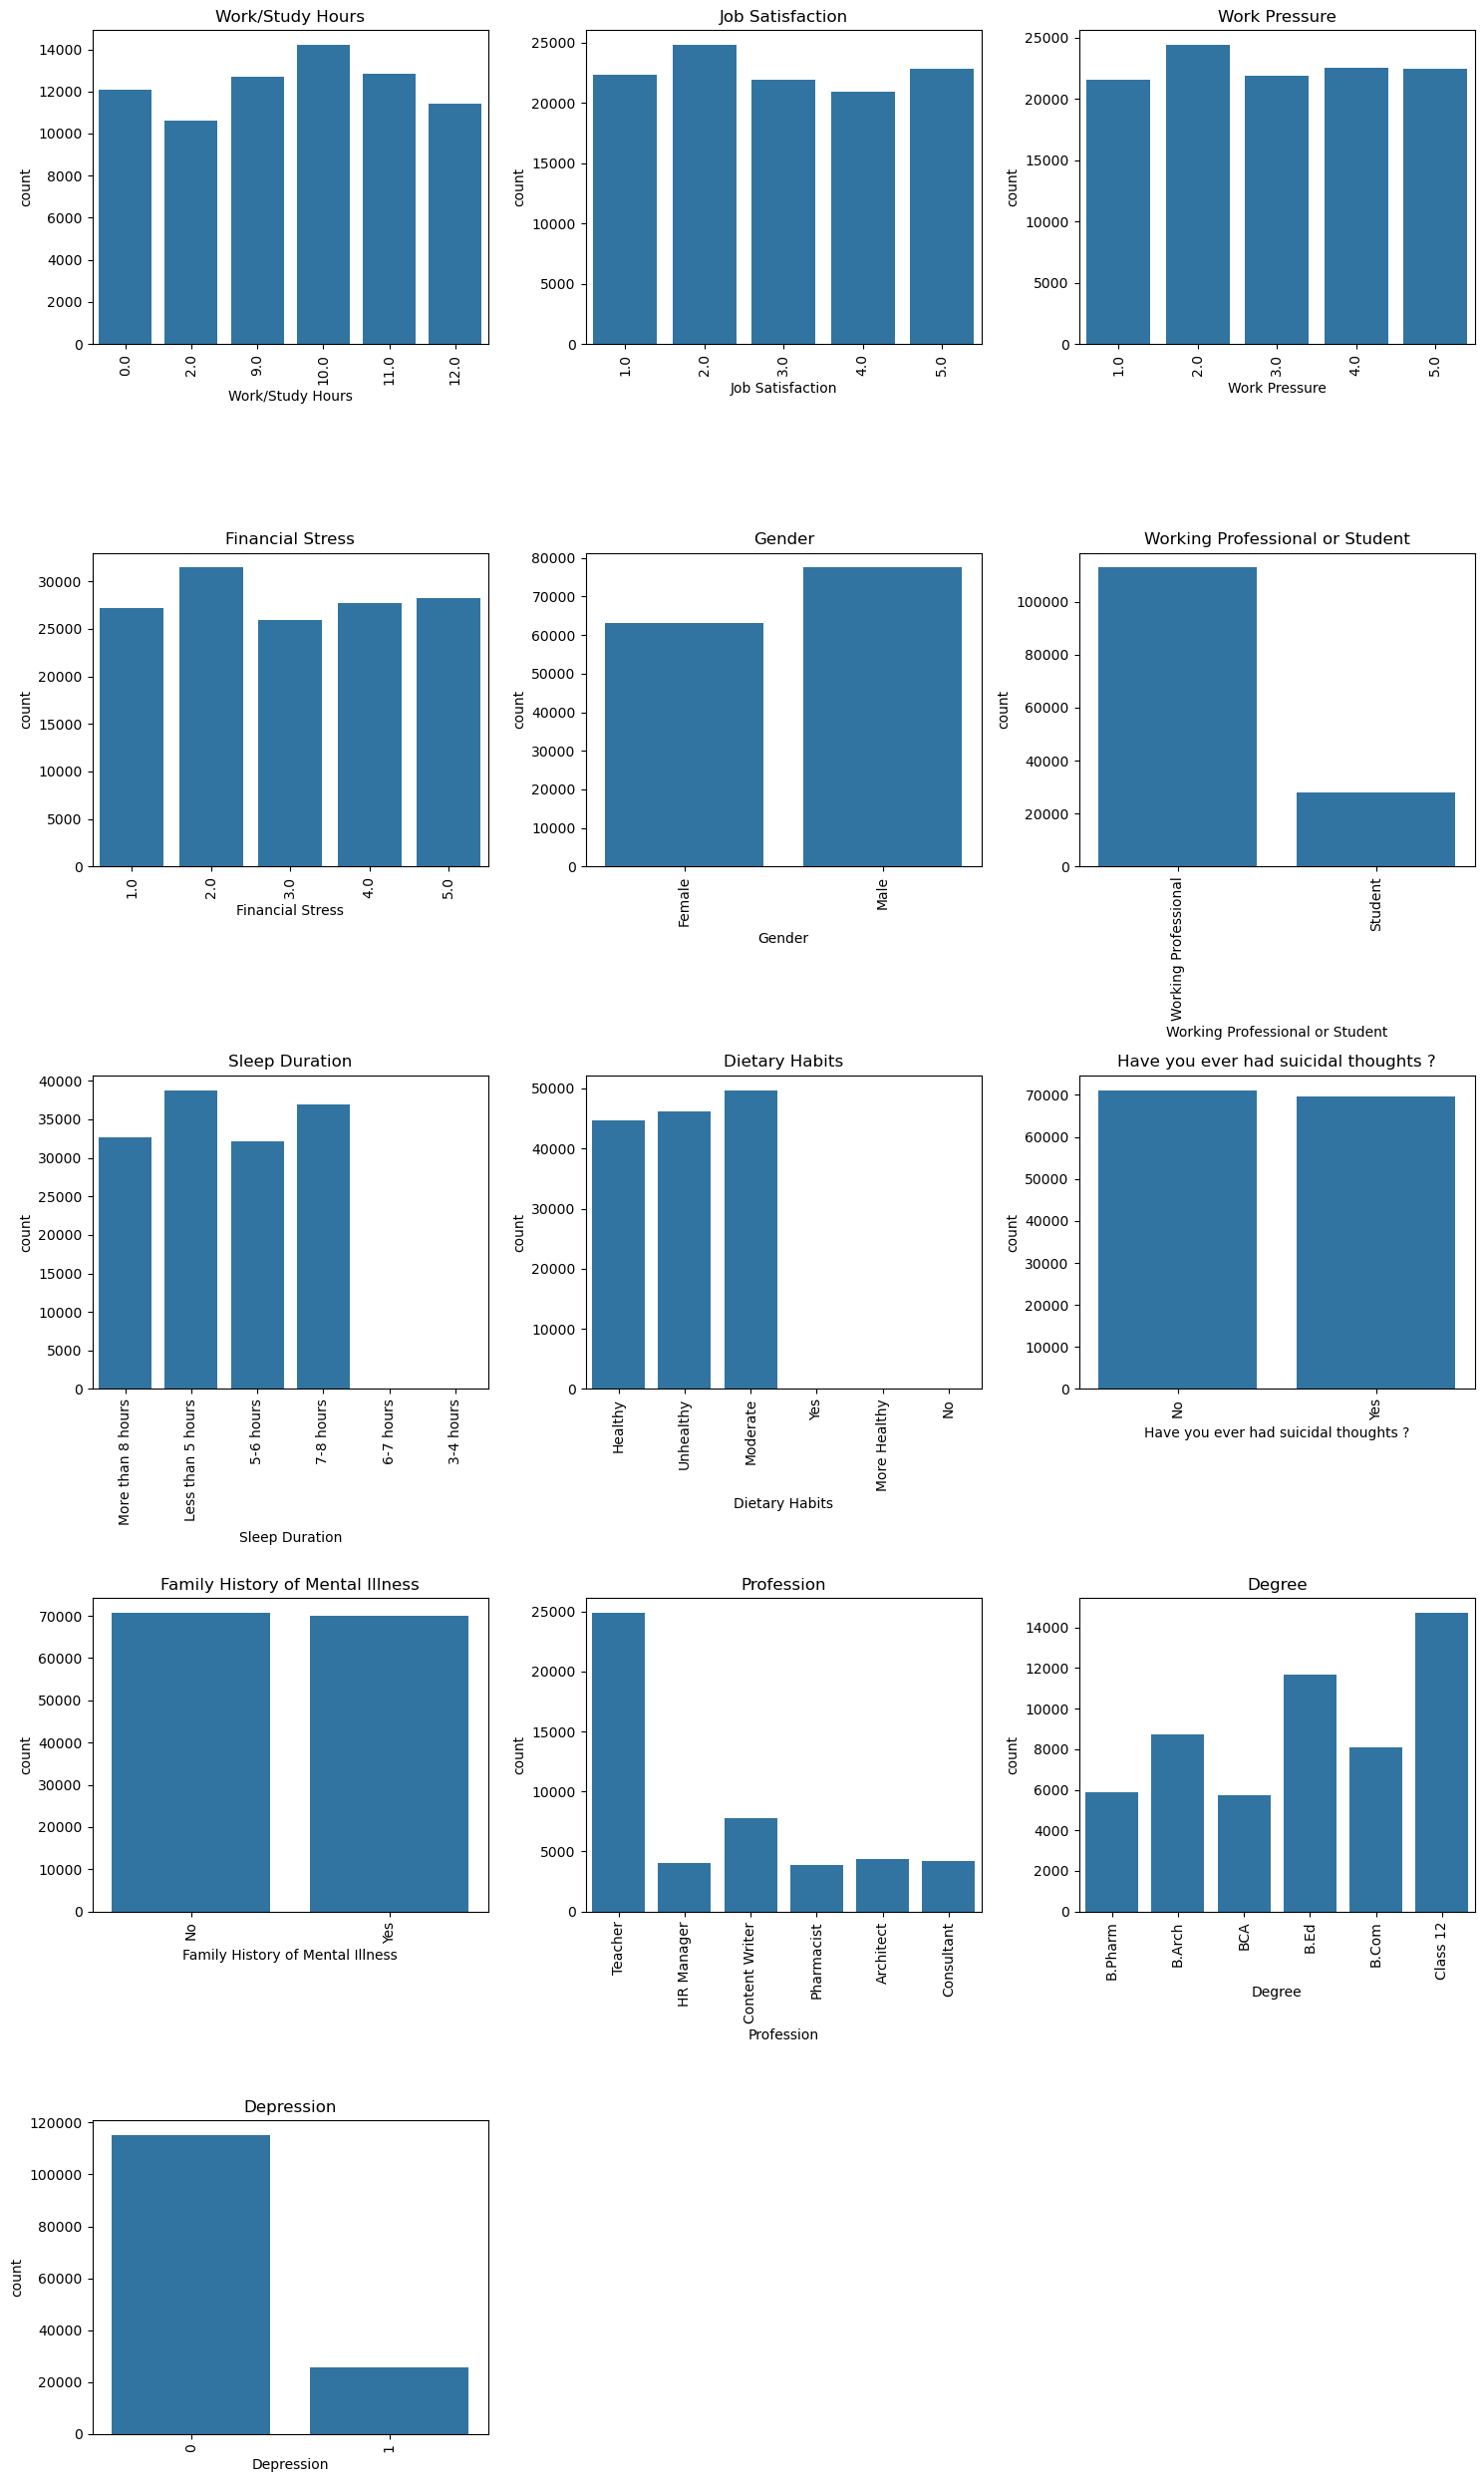

In [112]:
# Get the name of all columns with datatype 'object' (categorical column)
cat_vars=discrete_count + ordinal + nominal

# Create a figure with subplots
num_cols=len(cat_vars)
num_rows=(num_cols + 2) //3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using seaborn
for i,var in enumerate(cat_vars):
    top_values=data[var].value_counts().nlargest(6).index
    filtered_df=data[data[var].isin(top_values)]
    sns.countplot(x=var,data=filtered_df,ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x',rotation=90)

# Remove any extra subplots if needed
if num_cols<len(axs):
    for i in range(num_cols,len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

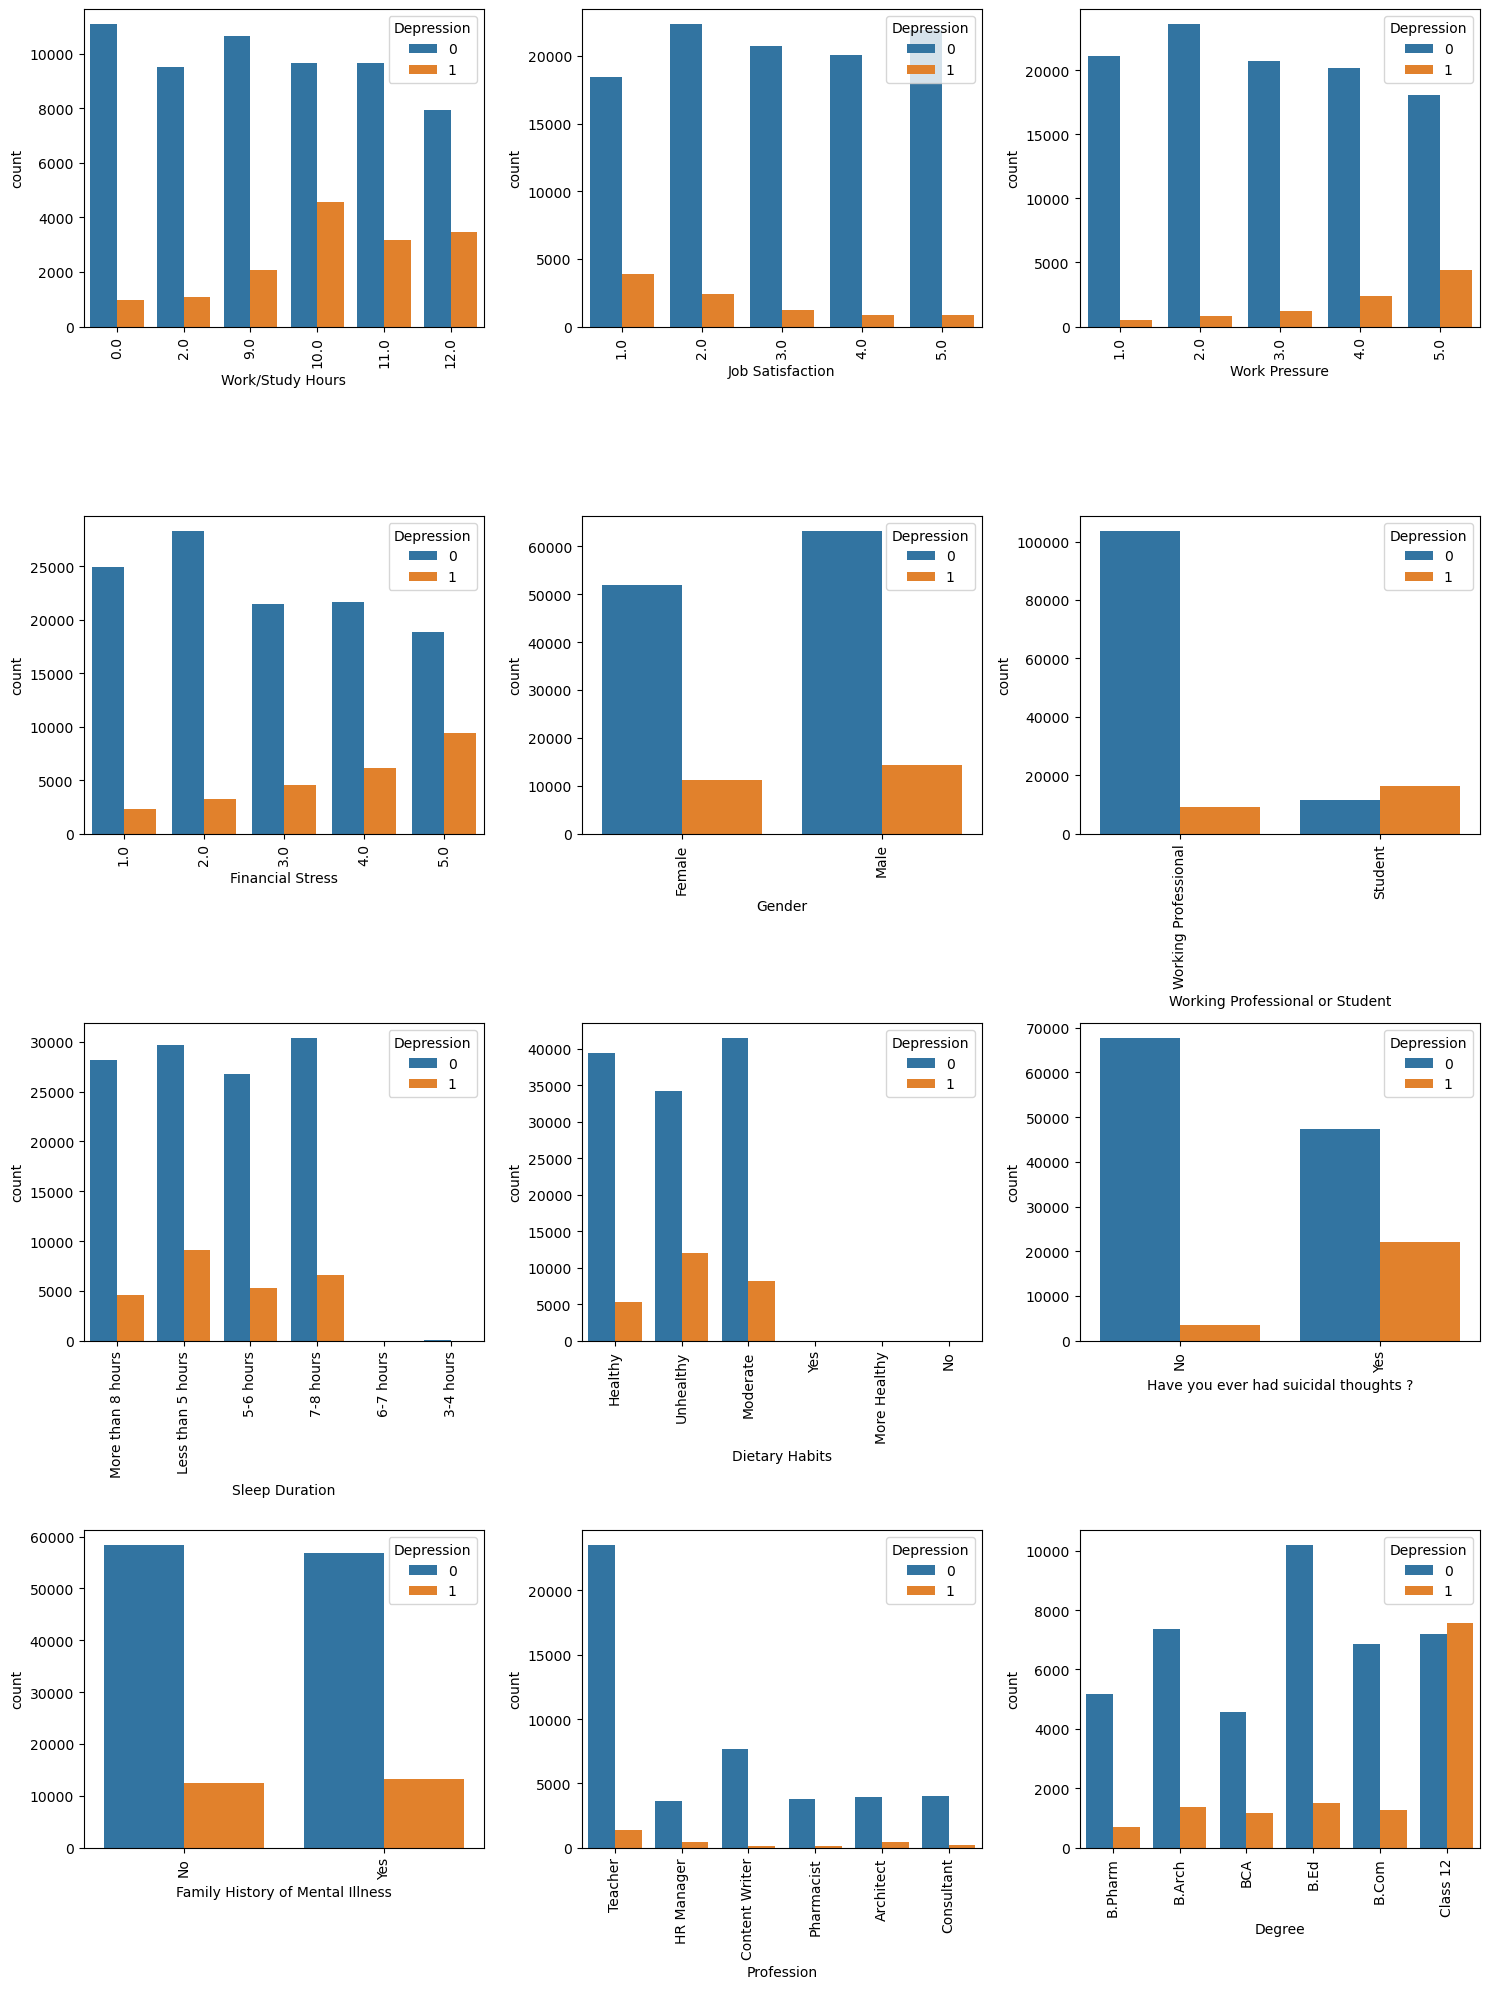

In [113]:
# Get the name of all columns with datatype 'object' (categorical column)
cat_vars=discrete_count + ordinal + nominal

# Exclude 'Depression' from the list if it exists in cat_vars
if 'Depression' in cat_vars:
    cat_vars.remove('Depression')

# Create a figure with subplots, but only include the required number of subplots
num_cols=len(cat_vars)
num_rows=(num_cols + 2) // 3   # to make sure there are enough rows for the subplots
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

# Create a count plot for the top 6 values of each categorical variable
for i,var in enumerate(cat_vars):
    top_values=data[var].value_counts().nlargest(6).index
    filtered_df=data[data[var].isin(top_values)]
    sns.countplot(x=var,hue='Depression',data=filtered_df,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

**Observations:**
- Due to class imbalance problem it shows in all case that depression ratio is high.

**Exploratory data analysis on Numerical columns**

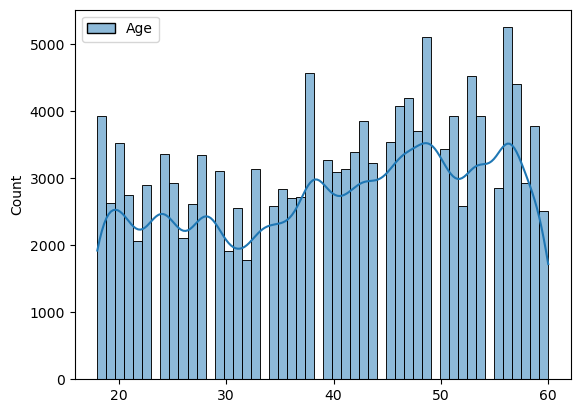

In [116]:
sns.histplot(data[continous],kde=True)
plt.show()

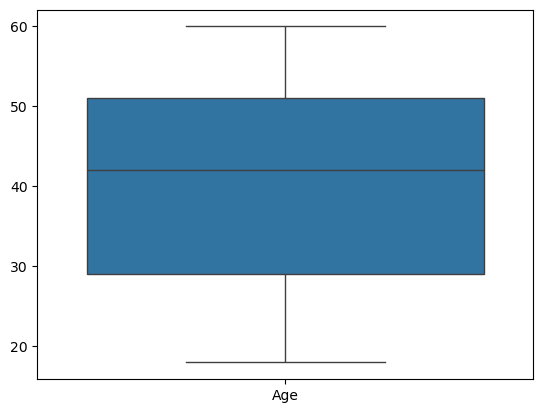

In [117]:
sns.boxplot(data[continous])
plt.show()

In [118]:
data[continous].skew()

Age   -0.217977
dtype: float64

### *Step-3: Data Preprocessing*

**1. Data Cleaning**

**1.1 Wrong data**

In [82]:
# Columns need to be handled
wrong_data_columns = ['Sleep Duration','Profession','Dietary Habits']

In [84]:
data['Sleep Duration'].replace({'Less than 5 hours':'Moderate','7-8 hours':'Good','More than 8 hours':'Excellent','5-6 hours':'Good','3-4 hours':'Moderate',
                               '6-7 hours':'Good','4-5 hours':'Moderate','2-3 hours':'Moderate','4-6 hours':'Good','6-8 hours':'Good','1-6 hours':'Good',
                                '9-11 hours':'Excellent','45':'Moderate','8-9 hours':'Excellent','10-6 hours':'Good','9-5':'Moderate','45-48 hours':'Good',
                                '3-6 hours':'Good','49 hours':'Excellent','than 5 hours':'Moderate','9-6 hours':'Good','8 hours':'Good','35-36 hours':'Good',
                                '1-3 hours':'Moderate','55-66 hours':'Good','40-45 hours':'Moderate','1-2 hours':'Moderate','9-5 hours':'Moderate',
                                '10-11 hours':'Excellent'
},inplace=True)

In [86]:
data['Sleep Duration'].value_counts()

Sleep Duration
Good                69139
Moderate            38817
Excellent           32733
No                      4
Sleep_Duration          2
Unhealthy               2
Indore                  1
Work_Study_Hours        1
Pune                    1
Name: count, dtype: int64

In [88]:
sleep_wrong_data = data[(data['Sleep Duration']!='Moderate') & (data['Sleep Duration']!='Good') & (data['Sleep Duration']!='Excellent')].index
sleep_wrong_data = sleep_wrong_data.tolist()
len(sleep_wrong_data)

11

In [90]:
data.drop(index=sleep_wrong_data,inplace=True)

In [92]:
data['Dietary Habits'].replace({'More Healthy':'Healthy','No Healthy':'Unhealthy','Less Healthy':'Unhealthy','Less than Healthy':'Unhealthy',
                               },inplace=True)

In [94]:
data['Dietary Habits'].value_counts()

Dietary Habits
Moderate       49703
Unhealthy      46224
Healthy        44740
Yes                2
No                 2
Electrician        1
Class 12           1
Indoor             1
Male               1
Vegas              1
M.Tech             1
1.0                1
Hormonal           1
Mihir              1
3                  1
Gender             1
BSc                1
Pratham            1
2                  1
Name: count, dtype: int64

In [96]:
data['Dietary Habits'].isnull().sum()

4

In [98]:
# Missing value also included
dietary_wrong_data = data[(data['Dietary Habits'] != 'Moderate') & (data['Dietary Habits'] != 'Unhealthy') & (data['Dietary Habits'] != 'Healthy')].index
dietary_wrong_data = dietary_wrong_data.tolist()
len(dietary_wrong_data)

22

In [100]:
data.drop(index=dietary_wrong_data,inplace=True)

In [102]:
data['Profession'].replace({'Academic':'Student', 'BCA':'Student',
                            'LLM':'Student', 'PhD':'Student', 'MBA':'Student','BE':'Student','M.Ed':'Student','B.Ed':'Student','MBBS':'Student',
                             'BBA':'Student','B.Com':'Student','Medical Doctor':'Doctor','Finanancial Analyst':'Financial Analyst'},
                           inplace=True)

In [104]:
pd.set_option('display.max_rows',None)
data['Profession'].value_counts()

Profession
Teacher                   24899
Content Writer             7814
Architect                  4369
Consultant                 4226
HR Manager                 4022
Pharmacist                 3891
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Financial Analyst          2901
Chef                       2862
Educational Consultant     2852
Data Scientist             2389
Researcher                 2327
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1747
Sales Executive            1739
Manager                    1737
Judge                      1711
Electrician                1582
Software Engineer          1510
Civil Engineer             1468
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 1339
Mechanical Engineer        11

In [106]:
profession_wrong_data = data[(data['Profession'] == 'Profession') | (data['Profession'] == 'Yogesh') | (data['Profession'] == 'Dev') | (data['Profession'] == 'Family Consultant') | (data['Profession'] == 'Visakhapatnam') | (data['Profession'] == 'Pranav') | (data['Profession'] == 'Analyst') | (data['Profession'] == 'Moderate') | (data['Profession'] == 'Nagpur') | (data['Profession'] == 'Unveil') | (data['Profession'] == 'Patna') | (data['Profession'] == 'Working Professional') | (data['Profession'] == 'City Manager') | (data['Profession'] == 'FamilyVirar') | (data['Profession'] == 'Yuvraj')].index
profession_wrong_data = profession_wrong_data.tolist()
len(profession_wrong_data)

19

In [108]:
data.drop(index=profession_wrong_data,inplace=True)

In [110]:
data['Degree'].replace({'Class 12':'Intermediate','B.Ed':'UG','B.Arch':'UG','B.Com':'UG','B.Pharm':'UG','BCA':'UG','M.Ed':'PG','MCA':'PG','BBA':'UG',
                        'BSc':'UG','MSc':'PG','LLM':'PG','M.Pharm':'PG','M.Tech':'PG','B.Tech':'UG','LLB':'UG','BHM':'UG','MBA':'PG','BA':'UG','ME':'PG',
                        'MD':'PG','MHM':'PG','BE':'UG','PhD':'DT','M.Com':'PG','MBBS':'UG','MA':'PG','M.Arch':'PG','B.Sc':'UG','BArch':'UG','MEd':'PG',
                        'BPharm':'UG','LLBA':'UG','BEd':'UG','LL B.Ed':'UG','L.Ed':'PG','HCA':'UG','S.Arch':'UG','LHM':'PG','LLTech':'PG','BB':'UG',
                        'M_Tech':'PG','E.Tech':'UG','RCA':'UG','B B.Com':'UG','LCA':'PG','N.Pharm':'UG','LLEd':'UG','K.Ed':'PG','ACA':'PG','P.Pharm':'UG',
                        'MPharm':'PG','LL.Com':'PG','H_Pharm':'UG','Class 11':'Intermediate','S.Tech':'UG','BH':'UG','MPA':'PG','S.Pharm':'UG',
                        'M. Business Analyst':'PG','B.B.Arch':'UG','B BA':'UG','BPA':'UG','MTech':'PG','LLCom':'PG'
},inplace=True)

In [111]:
# Missing value also included
degree_wrong_data = data[(data['Degree'] != 'UG') & (data['Degree'] != 'PG') & (data['Degree'] != 'Intermediate') & (data['Degree'] != 'DT')].index
degree_wrong_data = degree_wrong_data.tolist()
len(degree_wrong_data)

65

In [114]:
data.drop(index=degree_wrong_data,inplace=True)

In [116]:
pd.set_option('display.max_rows',None)
data['Degree'].value_counts()

Degree
UG              73213
PG              49539
Intermediate    14730
DT               3101
Name: count, dtype: int64

In [118]:
# Try by dropping 'profession' and 'Degree' column
# data.drop(columns='Degree',inplace=True)
# data.drop(columns = 'Profession',inplace=True)

In [120]:
data.shape

(140583, 14)

**1.2 Wrong data type**

In [147]:
# No wrong data type

**1.3 Duplicates**

In [122]:
data.duplicated().sum()

3599

In [171]:
# Remove Duplicates
# data.drop_duplicates(inplace=True,ignore_index=True)

**1.4 Missing values**

In [128]:
data.isnull().sum()

Gender                                   0
Age                                      0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [384]:
# data.dropna(inplace=True)

In [126]:
# Check with dropping missing values later replace them and retrain model
# Replace with mode
# data['Profession'].fillna(data['Profession'].mode()[0],inplace=True)
data["Profession"].fillna("Unemployed", inplace=True)
data['Work Pressure'].fillna(data['Work Pressure'].mode()[0],inplace=True)
data['Job Satisfaction'].fillna(data['Job Satisfaction'].mode()[0],inplace=True)
# data['Dietary Habits'].fillna(data['Dietary Habits'].mode()[0],inplace=True)
data['Financial Stress'].fillna(data['Financial Stress'].mode()[0],inplace=True)

**2. Data Wrangling**

**2.1 Feature Transformation**

In [486]:
# No feature transformation is required at this moment

**2.2 Feature Scaling**

In [130]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Age']=sc.fit_transform(data[['Age']])

**2.3 Discretization**

In [492]:
# No discretization is required at this moment

**2.4 Feature Encoding**

**1. Nominal encoding**

In [132]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data['Gender'] = en.fit_transform(data['Gender'])
data['Working Professional or Student'] = en.fit_transform(data['Working Professional or Student'])
data['Have you ever had suicidal thoughts ?'] = en.fit_transform(data['Have you ever had suicidal thoughts ?'])
data['Family History of Mental Illness'] = en.fit_transform(data['Family History of Mental Illness'])
data['Profession'] = en.fit_transform(data['Profession'])

**2. One Hot Encoding**

In [303]:
# data = pd.get_dummies(data,drop_first=True)

**3. Oridinal Encoding**

In [134]:
data["Sleep Duration"].replace({'Moderate':0,'Good':1,'Excellent':2},inplace=True)
data["Dietary Habits"].replace({'Unhealthy':0,'Moderate':1,'Healthy':2},inplace=True)
data['Degree'].replace({'Intermediate':0,'UG':1,'PG':2,'DT':3},inplace=True)

In [136]:
data.head()

,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,0.695320,1,3,5.0,2.0,2,2,1,0,1.0,2.0,0,0
1,1,-1.161933,1,32,4.0,3.0,0,0,1,1,7.0,3.0,0,1
2,1,-0.596682,0,35,2.0,2.0,1,2,1,1,3.0,1.0,0,1
3,1,-1.484933,1,32,5.0,1.0,0,1,1,1,10.0,1.0,1,1
4,0,-0.838933,1,2,1.0,1.0,1,0,1,1,9.0,4.0,1,0


In [138]:
data.to_csv('cleaned_data9.csv',index=False)